In [1]:
import pandas as pd

In [2]:
bike=pd.read_csv("bike.csv")

In [3]:
bike.head()

,Unnamed: 0,대여소번호,월,화,수,목,금,토,일,위도,경도
0,0,101,256,328,294,327,384,356,288,37.549561,126.905754
1,1,102,970,1068,1068,1127,1299,1228,1056,37.556000,126.910454
2,2,103,603,712,685,799,945,904,781,37.554951,126.910835
3,3,104,520,573,606,608,802,748,600,37.550629,126.914986
4,4,105,368,367,405,386,520,460,402,37.550007,126.914825


In [4]:
bike["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 1276, 1277, 1278], dtype=int64)

In [36]:
bike_1=pd.read_csv("6-8따릉이데이터.csv",encoding="euc-kr",parse_dates=["대여일시"])

C:\Users\B-11\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [182]:
bike_1.head(1)

,Unnamed: 0,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,대여요일,반납요일,구분,대여소명,위도,경도,거치대수
0,0,SPB-06960,2018-08-01,130,신촌역(2호선) 7번출구 앞,8.0,2018-08-01 00:03:00,130,신촌역(2호선) 7번출구 앞,5.0,2.0,170.0,2,2,마포구,130. 신촌역(2호선) 7번출구 앞,37.554859,126.936157,10


In [183]:
bike_1["대여대여소번호"].unique()

array([ 130,  579, 2255, ...,  661,  330, 2212], dtype=int64)

In [43]:
bike_data=bike_1[["대여일시","대여대여소번호"]]

In [44]:
bike_data.columns=["date","location"]

In [45]:
bike_data.head()

,date,location
0,2018-08-01 00:00:00,130
1,2018-08-01 00:08:00,130
2,2018-08-01 01:27:00,130
3,2018-08-01 00:04:00,130
4,2018-08-01 02:19:00,130


In [46]:
bike_data["day"]=bike_data["date"].dt.day
bike_data["month"]=bike_data["date"].dt.month

C:\Users\B-11\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\B-11\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265368 entries, 0 to 3265367
Data columns (total 4 columns):
date        datetime64[ns]
location    int64
day         int64
month       int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 99.7 MB


In [68]:
bike_data_00=bike_data.groupby(["month","day"]).size()
bike_data_00=pd.DataFrame(bike_data_00)
bike_data_00=bike_data_00.reset_index()
bike_data_00.columns=["month","day","count"]

In [72]:
bike_data_00.head()

,month,day,count
0,6,1,41302
1,6,2,41266
2,6,3,40150
3,6,4,43506
4,6,5,43627


In [75]:
bike_data_06=bike_data_00[bike_data_00["month"]==6]

In [104]:
bike_data_07=bike_data_00[bike_data_00["month"]==7]
bike_data_08=bike_data_00[bike_data_00["month"]==8]

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
temp_06_0=pd.read_csv("temp2/weather06.csv",encoding="euc-kr",parse_dates=["일시"])
temp_06_0.head()

,지점,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그
0,108,2018-06-01 01:00:00,19.5,0,NaN,NaN
1,108,2018-06-01 02:00:00,19.0,0,NaN,NaN
2,108,2018-06-01 03:00:00,18.6,0,NaN,NaN
3,108,2018-06-01 04:00:00,18.1,0,NaN,NaN
4,108,2018-06-01 05:00:00,17.8,0,NaN,NaN


In [79]:
temp_06_0=temp_06_0.iloc[:,1:3]
temp_06_0.columns=["date","temp"]

In [80]:
temp_06_0["day"]=temp_06_0["date"].dt.day

In [81]:
temp_06=temp_06_0[["temp","day"]].groupby("day").mean()
temp_06=temp_06.reset_index()
temp_06["month"]=6

In [176]:
data=pd.concat([bike_data_06,temp_06],axis=1)

In [177]:
data.head()

,month,day,count,day,temp,month
0,6,1,41302,1,23.865217,6
1,6,2,41266,2,23.512500,6
2,6,3,40150,3,23.712500,6
3,6,4,43506,4,22.883333,6
4,6,5,43627,5,23.566667,6


In [178]:
data.columns=["mo","da","count","day","temp","month"]

In [181]:
data_06=data[["count","day","temp"]]
data_06.corr()

,count,day,temp
count,1.000000,-0.165931,0.199581
day,-0.165931,1.000000,0.311404
temp,0.199581,0.311404,1.000000


In [105]:
temp_07_0=pd.read_csv("temp2/weather07.csv",encoding="euc-kr",parse_dates=["일시"])
temp_08_0=pd.read_csv("temp2/weather08.csv",encoding="euc-kr",parse_dates=["일시"])

In [106]:
temp_07_0=temp_07_0.iloc[:,1:3]
temp_07_0.columns=["date","temp"]
temp_07_0["day"]=temp_07_0["date"].dt.day
temp_07=temp_07_0[["temp","day"]].groupby("day").mean()
temp_07=temp_07.reset_index()
temp_07["month"]=7

In [107]:
temp_08_0=temp_08_0.iloc[:,1:3]
temp_08_0.columns=["date","temp"]
temp_08_0["day"]=temp_08_0["date"].dt.day
temp_08=temp_08_0[["temp","day"]].groupby("day").mean()
temp_08=temp_08.reset_index()
temp_08["month"]=8

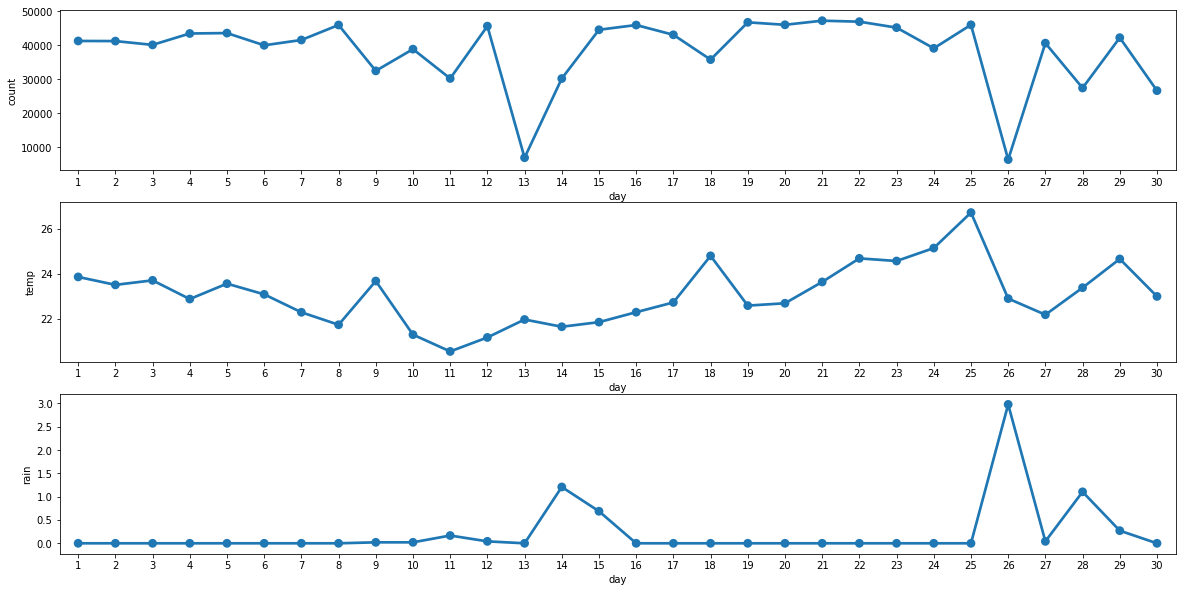

In [138]:
fig, ax= plt.subplots(3)
fig.set_size_inches(20,10)
sns.pointplot(data=bike_data_06, x="day",y="count",ax=ax[0])
sns.pointplot(data=temp_06, x="day",y="temp",ax=ax[1])
sns.pointplot(data=temp_06_11, x="day",y="rain",ax=ax[2])

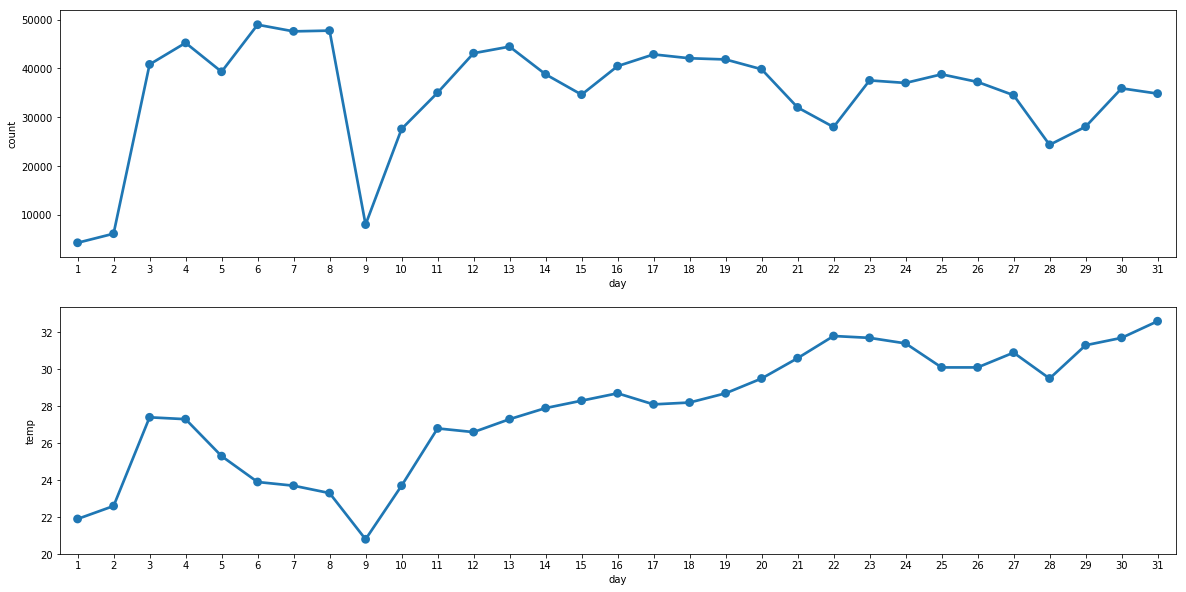

In [108]:
fig, ax= plt.subplots(2)
fig.set_size_inches(20,10)
sns.pointplot(data=bike_data_07, x="day",y="count",ax=ax[0])
sns.pointplot(data=temp_07, x="day",y="temp",ax=ax[1])

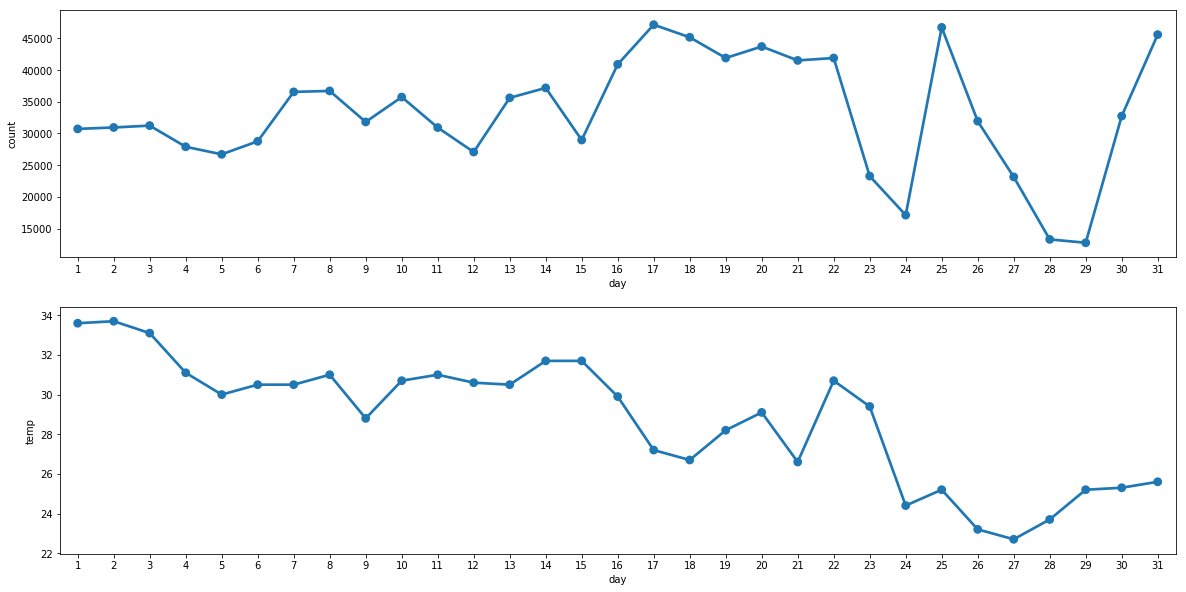

In [137]:
fig, ax= plt.subplots(2)
fig.set_size_inches(20,10)
sns.pointplot(data=bike_data_08, x="day",y="count",ax=ax[0])
sns.pointplot(data=temp_08, x="day",y="temp",ax=ax[1])

C:\Users\B-11\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


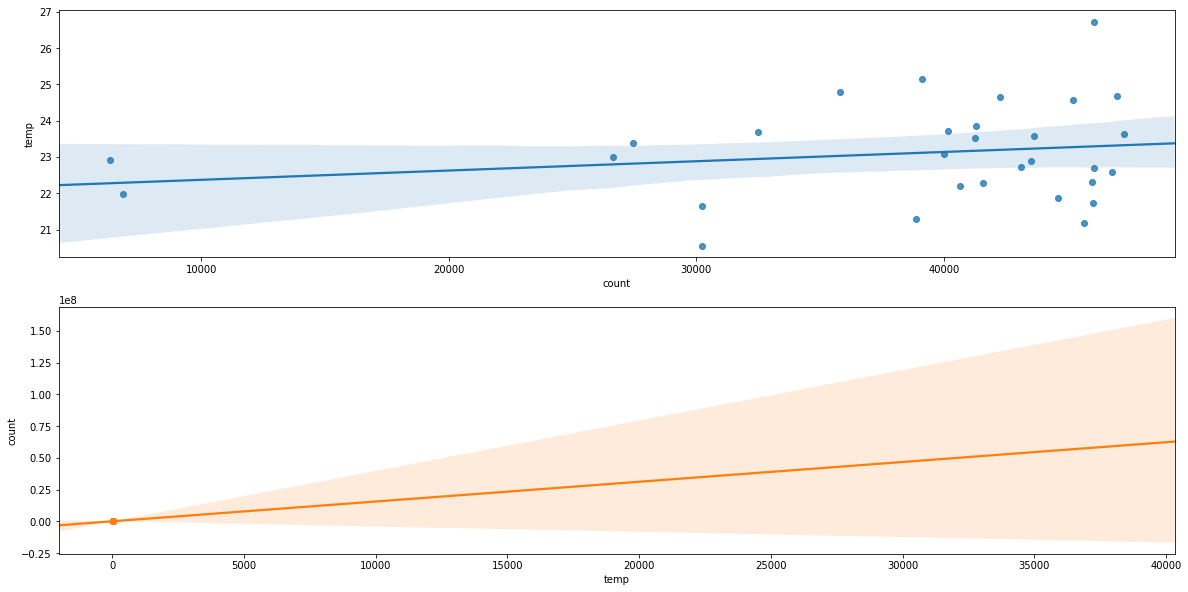

In [102]:
fig, ax= plt.subplots(2)
fig.set_size_inches(20,10)
sns.regplot(y='temp',x='count',data=data,ax=ax[0])
sns.regplot(y='count',x='temp',data=data,ax=ax[1])

In [ ]:
sns.regplot(y='temp',x='count',data=train,ax=ax[0])

In [184]:
df=pd.read_csv("temp2/weather06.csv",encoding="euc-kr",parse_dates=["일시"])

In [185]:
df["지점"].unique()

array([108], dtype=int64)

In [126]:
temp_06_1=pd.read_csv("temp2/weather06.csv",encoding="euc-kr",parse_dates=["일시"])
temp_06_1.head()

,지점,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그
0,108,2018-06-01 01:00:00,19.5,0,NaN,NaN
1,108,2018-06-01 02:00:00,19.0,0,NaN,NaN
2,108,2018-06-01 03:00:00,18.6,0,NaN,NaN
3,108,2018-06-01 04:00:00,18.1,0,NaN,NaN
4,108,2018-06-01 05:00:00,17.8,0,NaN,NaN


In [127]:
temp_06_1.columns=["location","date","temp","temp_QC","rain","rain_QC"]
temp_06_1=temp_06_1[["date","temp","rain"]]
temp_06_1["day"]=temp_06_1["date"].dt.day

In [128]:
temp_06_1["rain"]=temp_06_1["rain"].fillna(0)
temp_06_1["rain"].unique()

array([ 0. ,  0.4,  0.1,  0.5,  3.5,  1. ,  1.5, 13.5, 11.5,  5.4, 10.5,
        6.5,  9.5, 16. ,  5. , 14.5,  2.5,  4.5,  2. ,  4.9, 21.5,  0.2])

In [134]:
temp_06_11=temp_06_1.groupby("day").mean()
temp_06_11=temp_06_11.reset_index()
temp_06_11["month"]=6

In [135]:
temp_06_11.head()

,day,temp,rain,month
0,1,23.865217,0.0,6
1,2,23.512500,0.0,6
2,3,23.712500,0.0,6
3,4,22.883333,0.0,6
4,5,23.566667,0.0,6


In [140]:
temp_07_1=pd.read_csv("temp2/weather07.csv",encoding="euc-kr",parse_dates=["일시"])
temp_07_1.head()

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 풍속 시각(hhmi),평균 풍속(m/s),1시간 최다일사 시각(hhmi),평균 지면온도(°C)
0,108,2018-07-01,21.9,21.0,1201,22.8,213,1016.0,83.5,931,0.8,1300,22.2
1,108,2018-07-02,22.6,20.6,623,25.3,1656,1844.0,59.5,1907,0.7,1500,23.5
2,108,2018-07-03,27.4,22.5,510,32.6,1704,NaN,0.1,1704,0.8,1200,29.1
3,108,2018-07-04,27.3,24.0,535,31.8,1533,NaN,NaN,1634,1.7,1200,30.0
4,108,2018-07-05,25.3,23.4,620,29.0,1515,545.0,0.5,1347,1.2,1300,27.0


In [141]:
temp_07_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
지점                     31 non-null int64
일시                     31 non-null datetime64[ns]
평균기온(°C)               31 non-null float64
최저기온(°C)               31 non-null float64
최저기온 시각(hhmi)          31 non-null int64
최고기온(°C)               31 non-null float64
최고기온 시각(hhmi)          31 non-null int64
1시간 최다 강수량 시각(hhmi)    8 non-null float64
일강수량(mm)               10 non-null float64
최대 풍속 시각(hhmi)         31 non-null int64
평균 풍속(m/s)             31 non-null float64
1시간 최다일사 시각(hhmi)      31 non-null int64
평균 지면온도(°C)            31 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 3.2 KB


In [148]:
temp_07_1=pd.read_csv("temp2/weather07.csv",encoding="euc-kr",parse_dates=["일시"])
temp_07_1=temp_07_1[["일시","평균기온(°C)","일강수량(mm)","평균 풍속(m/s)"]]
temp_07_1.columns=["date","temp","rain","wind"]

temp_07_1["rain"]=temp_07_1["rain"].fillna(0)
temp_07_1["wind"]=temp_07_1["wind"].fillna(0)
temp_07_1["day"]=temp_07_1["date"].dt.day

temp_07_1["month"]=7

In [149]:
temp_07_1.head()

,date,temp,rain,wind,day,month
0,2018-07-01,21.9,83.5,0.8,1,7
1,2018-07-02,22.6,59.5,0.7,2,7
2,2018-07-03,27.4,0.1,0.8,3,7
3,2018-07-04,27.3,0.0,1.7,4,7
4,2018-07-05,25.3,0.5,1.2,5,7


In [186]:
from pyecharts import Bar

In [191]:
attr=temp_07_1["day"]
v1 =temp_07_1["temp"]
v2 =temp_08_1["temp"]
bar =Bar("기온비교")
bar.add("7월", attr, v1, mark_line=["average"], mark_point=["max", "min"])
bar.add("8월", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar

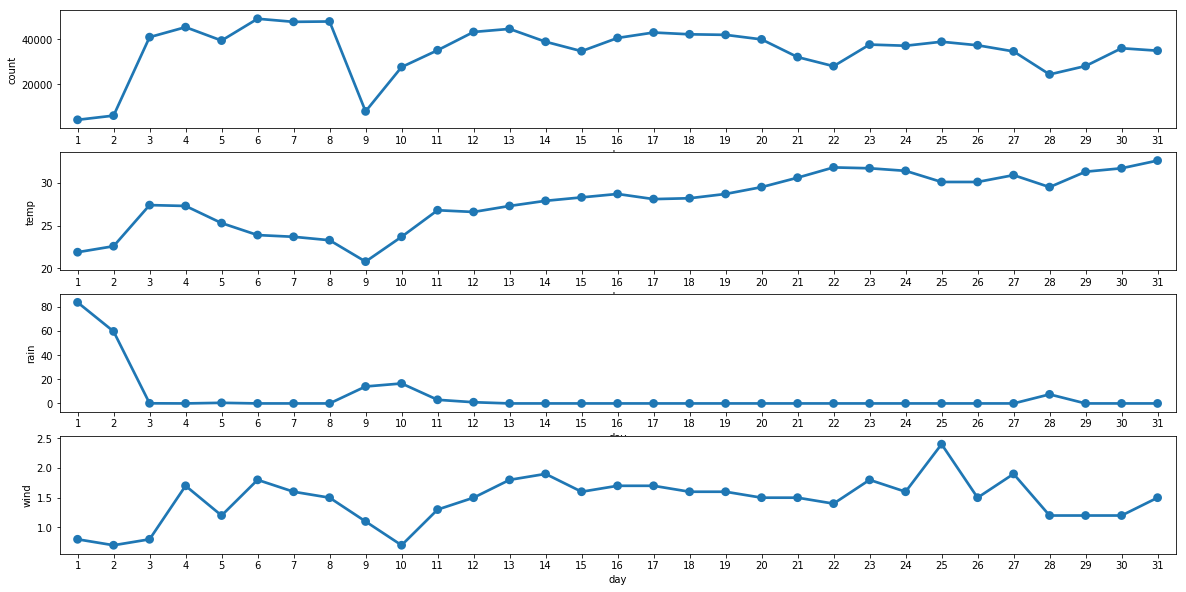

In [151]:
fig, ax= plt.subplots(4)
fig.set_size_inches(20,10)
sns.pointplot(data=bike_data_07, x="day",y="count",ax=ax[0])
sns.pointplot(data=temp_07_1, x="day",y="temp",ax=ax[1])
sns.pointplot(data=temp_07_1, x="day",y="rain",ax=ax[2])
sns.pointplot(data=temp_07_1, x="day",y="wind",ax=ax[3])

In [152]:
temp_08_1=pd.read_csv("temp2/weather08.csv",encoding="euc-kr",parse_dates=["일시"])
temp_08_1=temp_08_1[["일시","평균기온(°C)","일강수량(mm)","평균 풍속(m/s)"]]
temp_08_1.columns=["date","temp","rain","wind"]

temp_08_1["rain"]=temp_08_1["rain"].fillna(0)
temp_08_1["wind"]=temp_08_1["wind"].fillna(0)
temp_08_1["day"]=temp_08_1["date"].dt.day

temp_08_1["month"]=7

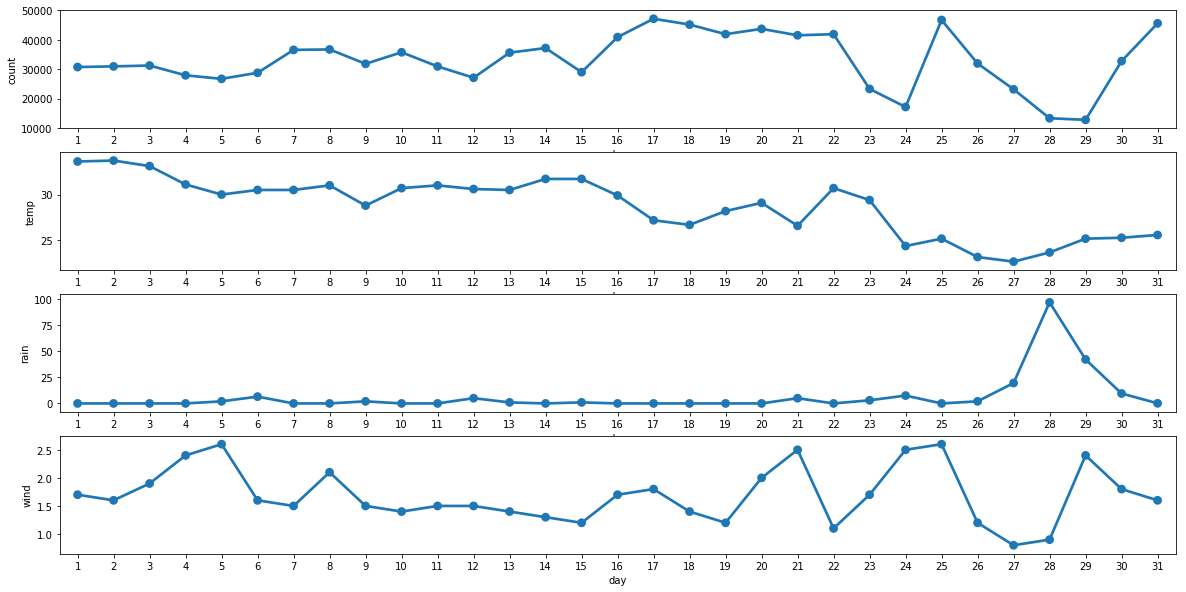

In [153]:
fig, ax= plt.subplots(4)
fig.set_size_inches(20,10)
sns.pointplot(data=bike_data_08, x="day",y="count",ax=ax[0])
sns.pointplot(data=temp_08_1, x="day",y="temp",ax=ax[1])
sns.pointplot(data=temp_08_1, x="day",y="rain",ax=ax[2])
sns.pointplot(data=temp_08_1, x="day",y="wind",ax=ax[3])

In [169]:
data_7=pd.merge(bike_data_07,temp_07_1,on="day")

In [170]:
data_7.head()

,month_x,day,count,date,temp,rain,wind,month_y
0,7,1,4311,2018-07-01,21.9,83.5,0.8,7
1,7,2,6170,2018-07-02,22.6,59.5,0.7,7
2,7,3,40827,2018-07-03,27.4,0.1,0.8,7
3,7,4,45241,2018-07-04,27.3,0.0,1.7,7
4,7,5,39320,2018-07-05,25.3,0.5,1.2,7


In [171]:
data_7.drop(["month_x","date"],axis=1,inplace=True)

In [172]:
data_7.columns=["day","count","temp","rain","wind","month"]

In [173]:
data_7.corr()

,day,count,temp,rain,wind,month
day,1.000000,0.100637,0.865735,-0.446876,0.369559,NaN
count,0.100637,1.000000,0.299229,-0.784765,0.630384,NaN
temp,0.865735,0.299229,1.000000,-0.538384,0.427033,NaN
rain,-0.446876,-0.784765,-0.538384,1.000000,-0.580505,NaN
wind,0.369559,0.630384,0.427033,-0.580505,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
data_8=pd.merge(bike_data_08,temp_08_1,on="day")
data_8.drop(["month_x","date"],axis=1,inplace=True)
data_8.columns=["day","count","temp","rain","wind","month"]
data_8.corr()

,day,count,temp,rain,wind,month
day,1.000000,-0.035814,-0.852642,0.404557,-0.104315,NaN
count,-0.035814,1.000000,0.144469,-0.609815,-0.001618,NaN
temp,-0.852642,0.144469,1.000000,-0.465835,-0.001109,NaN
rain,0.404557,-0.609815,-0.465835,1.000000,-0.196946,NaN
wind,-0.104315,-0.001618,-0.001109,-0.196946,1.000000,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
temp_07_1=pd.read_csv("temp2/weather07.csv",encoding="euc-kr",parse_dates=["일시"])
temp_07_1.columns=["location","date","temp","temp_QC","rain","rain_QC"]
temp_07_1=temp_07_1[["date","temp","rain"]]
temp_07_1["day"]=temp_07_1["date"].dt.day
temp_07_1["rain"]=temp_07_1["rain"].fillna(0)
temp_07_11=temp_07_1.groupby("day").mean()
temp_07_11=temp_07_11.reset_index()
temp_07_11["month"]=7

In [33]:
bike_data=bike_data[["date","month","day"]]

In [35]:
for i in range(len(bike_data["date"])):
    bike_data["day"][i]=bike_data["date"][i][8:10]
    bike_data["month"][i]=bike_data["date"][i][6]

C:\Users\B-11\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: 

In [ ]:
bike_data.groupby(["month","day"]).count()